In [1]:
from IPython.display import display, HTML    #창 크게 맞게 주피터창 조절
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

random.seed(10)
np.random.seed(10)

ar=np.zeros((10000,16),dtype=int)     #타입 안 정해주면 float 기본

ar[:,0]=np.arange(1,10001)     #id
ar[:,1]=np.random.randint(2,size=10000)        #gender
ar[:,2]=np.random.randint(10,91,size=10000)     #age
ar[:,3]=np.random.randint(1,11,size=10000)     #region
ar[:,4]=np.random.choice([11,22,33,44,55],10000)     #pdt_22 구매상품
ar[:,5]=np.random.choice([11,22,33,44,55],10000)     #pdt_23
ar[:,6]=np.random.randint(1,51,10000) * 1000     #pri_22 가격
ar[:,7]=np.random.randint(1,51,10000) * 1000     #pri_23
ar[:,8]=np.random.randint(1,21,10000)     #count_22 구매개수
ar[:,9]=np.random.randint(1,21,10000)     #count_23
ar[:,10]=np.random.randint(1,13,10000)     #time_22 가장 많이 구매한 시간대
ar[:,11]=np.random.randint(1,13,10000)     #time_23
ar[:,12]=np.random.randint(1,6,size=10000)     #channel 구매한 매장 유형
ar[:,13]=ar[:,6]*ar[:,8]     #pur_22 구매총합
ar[:,14]=ar[:,7]*ar[:,9]     #pur_23
ar[:,15]=np.where(ar[:,14]>ar[:,13], 1, 0)     #sales (구매액 증가:1)

############## 데이터프레임 생성 ##############
col=['id','gender','age','region','pdt_22','pdt_23','pri_22','pri_23','ct_22','ct_23',
    'mon_22','mon_23','channel','pur_22','pur_23','sales']

af=pd.DataFrame(ar, columns=col)
af=af.set_index('id')

af_org=af.copy()

############## NaN값 삽입 ##############
for i in range(len(af.iloc[0])-3):       #각 칼럼별 nan값 넣기(id, 구매액, 증감 제외)
    nan_c=random.sample(range(10000),10)
    for k in nan_c:
        af.iloc[k,i]=np.nan

af.isnull().sum()
df=af

In [2]:
df 

,gender,age,region,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,mon_22,mon_23,channel,pur_22,pur_23,sales
id,,,,,,,,,,,,,,,
1,1.0,74.0,4.0,22.0,33.0,37000.0,46000.0,13.0,6.0,9.0,7.0,4.0,481000,276000,0
2,1.0,65.0,2.0,44.0,44.0,11000.0,40000.0,11.0,9.0,12.0,2.0,1.0,121000,360000,1
3,0.0,64.0,6.0,22.0,55.0,8000.0,35000.0,8.0,19.0,12.0,9.0,2.0,64000,665000,1
4,1.0,80.0,2.0,44.0,33.0,9000.0,47000.0,5.0,12.0,3.0,9.0,3.0,45000,564000,1
5,0.0,48.0,5.0,11.0,11.0,9000.0,20000.0,6.0,7.0,6.0,3.0,4.0,54000,140000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,63.0,7.0,55.0,33.0,35000.0,6000.0,10.0,15.0,10.0,9.0,1.0,350000,90000,0
9997,1.0,65.0,2.0,44.0,44.0,25000.0,5000.0,4.0,9.0,2.0,3.0,4.0,100000,45000,0
9998,1.0,42.0,5.0,33.0,11.0,28000.0,16000.0,4.0,13.0,4.0,8.0,5.0,112000,208000,1


In [3]:
##### 나이 범주화 #####
def get_cate(age):
    cat=''
    if age<=19: cat='10대'
    elif age<=29: cat='20대'
    elif age<=39: cat='30대'
    elif age<=49: cat='40대'
    elif age<=59: cat='50대'
    elif age<=69: cat='60대'
    elif age<=79: cat='70대'
    elif age<=89: cat='80대'
    else: cat='90대'
    return cat

df['age_cat']=df.age.apply(lambda x: get_cate(x))

In [4]:
df

,gender,age,region,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,mon_22,mon_23,channel,pur_22,pur_23,sales,age_cat
id,,,,,,,,,,,,,,,,
1,1.0,74.0,4.0,22.0,33.0,37000.0,46000.0,13.0,6.0,9.0,7.0,4.0,481000,276000,0,70대
2,1.0,65.0,2.0,44.0,44.0,11000.0,40000.0,11.0,9.0,12.0,2.0,1.0,121000,360000,1,60대
3,0.0,64.0,6.0,22.0,55.0,8000.0,35000.0,8.0,19.0,12.0,9.0,2.0,64000,665000,1,60대
4,1.0,80.0,2.0,44.0,33.0,9000.0,47000.0,5.0,12.0,3.0,9.0,3.0,45000,564000,1,80대
5,0.0,48.0,5.0,11.0,11.0,9000.0,20000.0,6.0,7.0,6.0,3.0,4.0,54000,140000,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,63.0,7.0,55.0,33.0,35000.0,6000.0,10.0,15.0,10.0,9.0,1.0,350000,90000,0,60대
9997,1.0,65.0,2.0,44.0,44.0,25000.0,5000.0,4.0,9.0,2.0,3.0,4.0,100000,45000,0,60대
9998,1.0,42.0,5.0,33.0,11.0,28000.0,16000.0,4.0,13.0,4.0,8.0,5.0,112000,208000,1,40대


In [5]:
##### 발렌타인세트 구매자 중 1/3 -> 30대로 변경 #####
idx1 = df['pdt_22']==33
idx2 = df['age_cat'] != '30대'
bal=pd.DataFrame(df.age[idx1 & idx2])
bal[::3] = pd.DataFrame(np.random.randint(30,40,len(bal[::3])))
df.age[idx1 & idx2]=bal.age

idx1 = df['pdt_23']==33
idx2 = df['age_cat'] != '30대'
bal=pd.DataFrame(df.age[idx1 & idx2])
bal[::3] = pd.DataFrame(np.random.randint(30,40,len(bal[::3])))
df.age[idx1 & idx2]=bal.age

df['age_cat']=df.age.apply(lambda x: get_cate(x))


In [6]:
##### 2월, 3월, 12월 가중치 #####
idx1 = df['mon_22']==2
idx2 = df['mon_22']==3
idx3 = df['mon_22']==12
df.ct_22[idx1 | idx2 | idx3] +=20

idx1 = df['mon_23']==2
idx2 = df['mon_23']==3
idx3 = df['mon_23']==12
df.ct_23[idx1 | idx2 | idx3] +=20

In [7]:
##### 팝업스토어 2,3,12월 가중치 #####
idx1 = df['channel']==2
idx2 = (df['mon_22']==2) | (df['mon_22']==3) | (df['mon_22']==12)
df.ct_22[idx1 & idx2] +=20



idx1 = df['channel']==2
idx2 = (df['mon_23']==2) | (df['mon_23']==3) | (df['mon_23']==12)
df.ct_23[idx1 & idx2] +=20

In [8]:
##### 인터넷, 편의점 구매자 가중치 #####
idx1 = df['channel']==1
df.ct_22[idx1] +=20
df.ct_23[idx1] +=20

idx1 = df['channel']==5
df.ct_22[idx1] +=10
df.ct_23[idx1] +=10

In [11]:
##### 10,20,30대 가중치+ #####
##### 60,70,80,90대 가중치- #####
idx1 = df['age_cat']=='10대'
df.ct_22[idx1] +=10
df.ct_23[idx1] +=10

idx2 = df['age_cat']=='20대'
idx3 = df['age_cat']=='30대'
df.ct_22[idx2 | idx3] +=20
df.ct_23[idx2 | idx3] +=20

idx1 = df['age_cat']=='60대'
idx2 = df['age_cat']=='70대'
idx3 = df['age_cat']=='80대'
idx4 = df['age_cat']=='90대'
df.ct_22[idx1 | idx2 | idx3 | idx4] = (df.ct_22[idx1 | idx2 | idx3 | idx4] // 3) +1
df.ct_23[idx1 | idx2 | idx3 | idx4] = (df.ct_23[idx1 | idx2 | idx3 | idx4] // 3) +1

In [12]:
##### 구매감소 고객: 남성이 더 많음 #####
# (여성 감소 고객 일부를 남성으로 변경)
idx1 = df['gender']==1
idx2 = df['sales']==0
bal=pd.DataFrame(df.gender[idx1 & idx2])
bal[::3] = pd.DataFrame([0 for i in range(len(bal[::3]))])
df.gender[idx1 & idx2]=bal.gender


In [13]:
##### 22년 매출 > 23년 매출 #####
df.ct_22 += 5    #22년도 구매개수 증가시킴

In [14]:
# 구매액 = 구매개수*상품가격
df.pur_22=df.ct_22*df.pri_22
df.pur_23=df.ct_23*df.pri_23

In [15]:
# nan값 처리/ 각 상품에 맞는 가격 삽입/ 데이터 타입변경
df.dropna(subset=['pdt_22', 'pdt_23', 'ct_22', 'ct_23', 'pur_22', 'pur_23'], axis=0, inplace=True)
df.age.replace(np.nan, 0, inplace=True)

price_dict = {11: 3000, 22: 10000, 33: 50000, 44: 30000, 55: 9000}
df['pri_22'] = df['pdt_22'].map(price_dict)
df['pri_23'] = df['pdt_23'].map(price_dict)

df['ct_22']=df['ct_22'].astype('int')
df['ct_23']=df['ct_23'].astype('int')
df['pri_22']=df['pri_22'].astype('int')
df['pri_23']=df['pri_23'].astype('int')
df['pur_22']=df['pur_22'].astype('int')
df['pur_23']=df['pur_23'].astype('int')

In [16]:
# 데이터명 수정/ 매출 총액, 전년대비 매출 증감폭 칼럼 추가/ 안 쓰는 칼럼 삭제
df.gender.replace({0:'남성',1:'여성', np.nan:'정보없음'}, inplace=True)
df.mon_22.replace({1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',7:'7월',8:'8월',9:'9월',10:'10월',11:'11월',12:'12월', np.nan:'정보없음'}, inplace=True)
df.mon_23.replace({1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',7:'7월',8:'8월',9:'9월',10:'10월',11:'11월',12:'12월', np.nan:'정보없음'}, inplace=True)
df['pdt_22'].replace({11:'과일맛사탕세트',22:'카라멜세트',33:'발렌타인세트',44:'초콜릿세트',55:'젤리세트'}, inplace=True)
df['pdt_23'].replace({11:'과일맛사탕세트',22:'카라멜세트',33:'발렌타인세트',44:'초콜릿세트',55:'젤리세트'}, inplace=True)
df.channel.replace({1:'인터넷',2:'팝업스토어',3:'백화점',4:'할인마트',5:'편의점',np.nan:'기타'}, inplace=True)

df.insert(14,'pur_all', df.pur_22 + df.pur_23)
df.insert(15,'pur_gap', abs(df.pur_23 - df.pur_22))

df=df.drop('region',axis=1)

In [17]:
df.isnull().sum()

gender     0
age        0
pdt_22     0
pdt_23     0
pri_22     0
pri_23     0
ct_22      0
ct_23      0
mon_22     0
mon_23     0
channel    0
pur_22     0
pur_23     0
pur_all    0
pur_gap    0
sales      0
age_cat    0
dtype: int64

In [18]:
df.corr()

,age,pri_22,pri_23,ct_22,ct_23,pur_22,pur_23,pur_all,pur_gap,sales
age,1.000000,-0.068123,-0.073670,-0.769655,-0.774505,-0.574114,-0.595553,-0.668225,-0.521601,0.006213
pri_22,-0.068123,1.000000,0.009822,0.144214,0.133776,0.095240,0.102271,0.112805,0.069769,-0.007409
pri_23,-0.073670,0.009822,1.000000,0.146492,0.136719,0.120730,0.111278,0.132671,0.098969,0.002404
ct_22,-0.769655,0.144214,0.146492,1.000000,0.921969,0.749611,0.709274,0.834073,0.642342,-0.050123
ct_23,-0.774505,0.133776,0.136719,0.921969,1.000000,0.691109,0.767730,0.832967,0.630169,0.029642
pur_22,-0.574114,0.095240,0.120730,0.749611,0.691109,1.000000,0.530937,0.879201,0.565526,-0.246730
pur_23,-0.595553,0.102271,0.111278,0.709274,0.767730,0.530937,1.000000,0.870550,0.491636,0.217203
pur_all,-0.668225,0.112805,0.132671,0.834073,0.832967,0.879201,0.870550,1.000000,0.604812,-0.021152
pur_gap,-0.521601,0.069769,0.098969,0.642342,0.630169,0.565526,0.491636,0.604812,1.000000,-0.068987
sales,0.006213,-0.007409,0.002404,-0.050123,0.029642,-0.246730,0.217203,-0.021152,-0.068987,1.000000


In [19]:
df.pur_23.describe()

count    9.941000e+03
mean     9.974718e+05
std      1.209381e+06
min      1.000000e+03
25%      5.400000e+04
50%      4.400000e+05
75%      1.672000e+06
max      5.950000e+06
Name: pur_23, dtype: float64

In [20]:
df

,gender,age,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,mon_22,mon_23,channel,pur_22,pur_23,pur_all,pur_gap,sales,age_cat
id,,,,,,,,,,,,,,,,,
1,남성,35.0,카라멜세트,발렌타인세트,10000,50000,78,66,9월,7월,할인마트,2886000,3036000,5922000,150000,0,30대
2,여성,65.0,초콜릿세트,초콜릿세트,30000,30000,8,3,12월,2월,인터넷,88000,120000,208000,32000,1,60대
3,남성,64.0,카라멜세트,젤리세트,10000,9000,8,2,12월,9월,팝업스토어,64000,70000,134000,6000,1,60대
4,여성,80.0,초콜릿세트,발렌타인세트,30000,50000,7,1,3월,9월,백화점,63000,47000,110000,16000,1,80대
5,남성,48.0,과일맛사탕세트,과일맛사탕세트,3000,3000,11,27,6월,3월,할인마트,99000,540000,639000,441000,1,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,남성,63.0,젤리세트,발렌타인세트,9000,50000,7,2,10월,9월,인터넷,245000,12000,257000,233000,0,60대
9997,여성,65.0,초콜릿세트,초콜릿세트,30000,30000,7,2,2월,3월,할인마트,175000,10000,185000,165000,0,60대
9998,여성,42.0,발렌타인세트,과일맛사탕세트,50000,3000,19,23,4월,8월,편의점,532000,368000,900000,164000,1,40대


In [21]:
##### 구매형태별 매출액 #####
channel = df.groupby(['channel'])
ch = channel.agg({'pur_all':['sum','mean']}).round(1)

ch
# 인터넷, 편의점, 팝업스토어 순으로 매출이 높음

pur_all           
                  sum       mean
channel                         
기타       1.575900e+07  1575900.0
백화점      3.526751e+09  1849371.3
인터넷      5.094948e+09  2592848.9
팝업스토어    4.140094e+09  2072119.1
편의점      4.494157e+09  2196557.7
할인마트     3.784204e+09  1878016.9

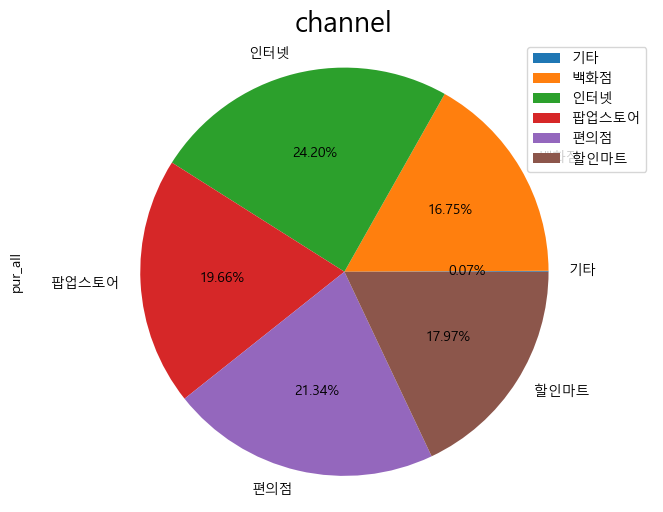

In [22]:
df_channel=df.groupby('channel').sum()
df_channel


df_channel.pur_all.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('channel', size=20)
plt.axis('equal')
plt.legend(labels=df_channel.index, loc='best')

In [23]:
##### 각 연령대별 상품 구매개수, 매출액(총합/평균) + 구매한 인원 수(sales-count) #####
age_pdt22 = df.groupby(['age_cat','pdt_22'])
ap22 = age_pdt22.agg({'ct_22':'sum', 'pur_22':['sum','mean'], 'sales':'count'}).round(1)

age_pdt23 = df.groupby(['age_cat','pdt_23'])
ap23 = age_pdt23.agg({'ct_23':'sum', 'pur_23':['sum','mean'], 'sales':'count'}).round(1)

ap23


# 10,20,30대에서 전체적으로 인원수 대비 구매율이 높음
# 30대에서 특히 발렌타인세트가 많이 팔림
# 구매자 수는 20,30대가 가장 많음
# 60대 이상부턴 구매인원 수에 비해 매출액(평균)이 급하락하는 추세

ct_23      pur_23            sales
                   sum         sum       mean count
age_cat pdt_23                                     
10대     과일맛사탕세트  11831   334175000  1498542.6   223
        발렌타인세트    7285   198092000  1404907.8   141
        젤리세트     12821   325200000  1377966.1   236
        초콜릿세트    13383   326568000  1265767.4   258
        카라멜세트    10533   271175000  1369570.7   198
20대     과일맛사탕세트  17655   469121000  2192154.2   214
        발렌타인세트   12340   303563000  2037335.6   149
        젤리세트     19217   488669000  2124647.8   230
        초콜릿세트    17807   452035000  2073555.0   218
        카라멜세트    18419   462622000  2083882.9   222
30대     과일맛사탕세트  29721   738210000  2039254.1   362
        발렌타인세트   73339  1924905000  2141162.4   899
        젤리세트     30806   794695000  2130549.6   373
        초콜릿세트    29277   744774000  2092061.8   356
        카라멜세트    29595   700697000  1951802.2   359
40대     과일맛사탕세트   4833   126433000   559438.1   226
        발렌타인세트    3742    84473000   502815.5   168
        젤리세트      5467   137389000   577264.7   238
        초콜릿세트     5808   137062000   535398.4   256
        카라멜세트     4970   125808000   546991.3   230
50대     과일맛사탕세트   4968   114642000   514089.7   223
        발렌타인세트    3128    80277000   581717.4   138
        젤리세트      4683   119833000   559967.3   214
        초콜릿세트     5296   147535000   664572.1   222
        카라멜세트     6161   158721000   675408.5   235
60대     과일맛사탕세트    393    10034000    45402.7   221
        발렌타인세트     258     6648000    44026.5   151
        젤리세트       449    11752000    45550.4   258
        초콜릿세트      457    11597000    45478.4   255
        카라멜세트      452    11966000    46200.8   259
70대     과일맛사탕세트    415    10150000    43191.5   235
        발렌타인세트     246     6079000    44050.7   138
        젤리세트       378     9573000    42171.8   227
        초콜릿세트      434    10494000    41808.8   251
        카라멜세트      445    11059000    45510.3   243
80대     과일맛사탕세트    405     9923000    44299.1   224
        발렌타인세트     243     6650000    45547.9   146
        젤리세트       372     9058000    44402.0   204
        초콜릿세트      417    10144000    43166.0   235
        카라멜세트      371    10235000    48507.1   211
90대     과일맛사탕세트     34      677000    35631.6    19
        발렌타인세트      39      826000    39333.3    21
        젤리세트        29      877000    58466.7    15
        초콜릿세트       35      708000    33714.3    21
        카라멜세트       30      743000    39105.3    19

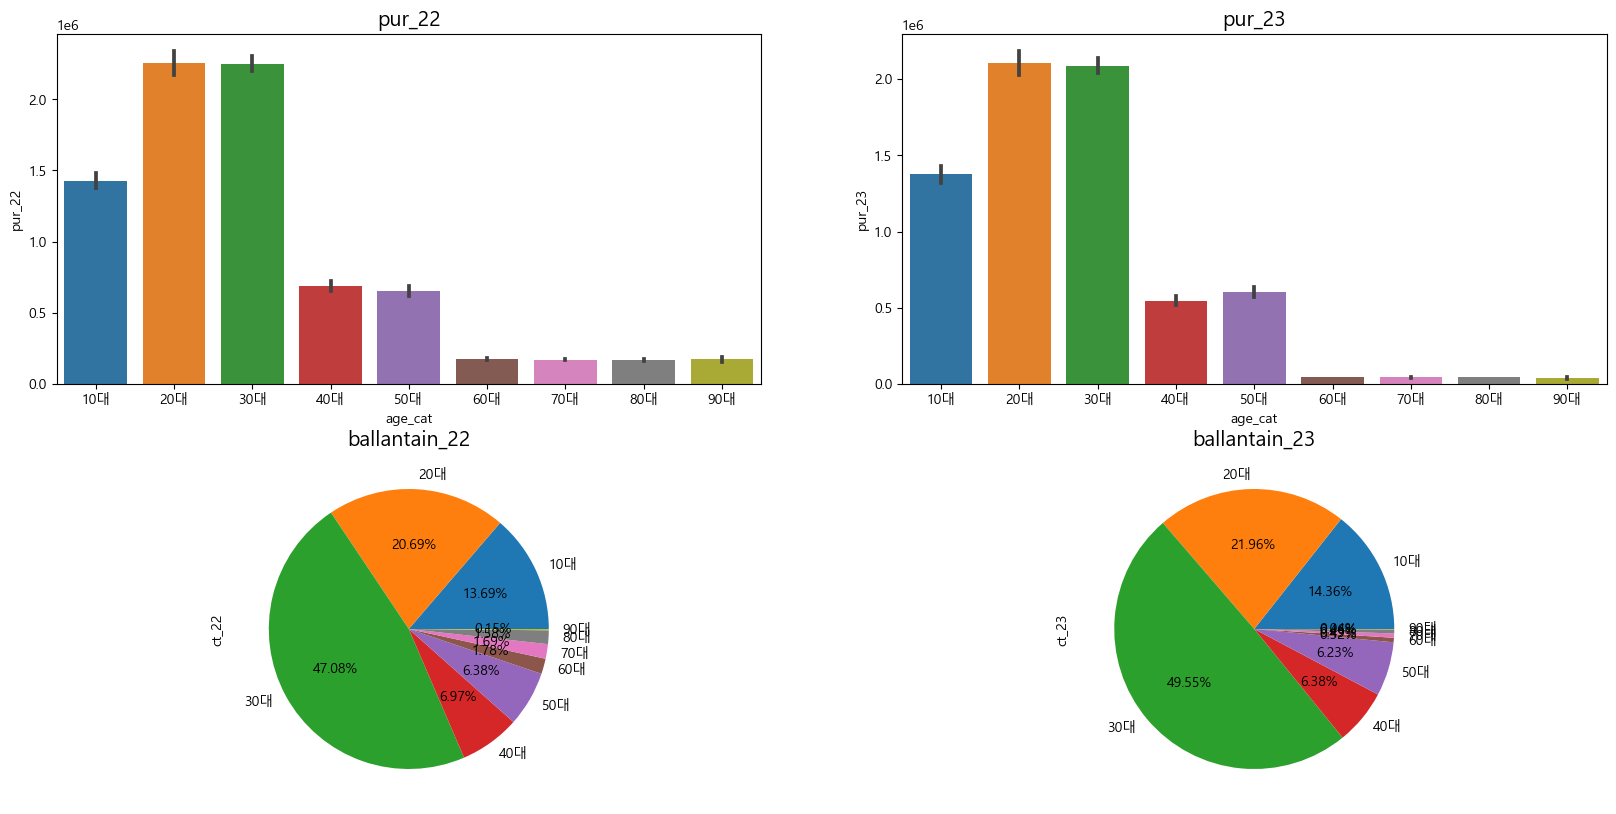

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.barplot(x='age_cat', y='pur_22', order=['10대', '20대','30대','40대','50대','60대','70대','80대','90대'], data=df, ax=axes[0, 0])
axes[0, 0].set_title('pur_22', size=15)

sns.barplot(x='age_cat', y='pur_23', order=['10대', '20대','30대','40대','50대','60대','70대','80대','90대'], data=df, ax=axes[0, 1])
axes[0, 1].set_title('pur_23', size=15)

df.groupby('age_cat').sum().ct_22.plot(kind='pie', autopct='%.2f%%', startangle=0, ax=axes[1, 0])
axes[1, 0].set_title('ballantain_22', size=15)

df.groupby('age_cat').sum().ct_23.plot(kind='pie', autopct='%.2f%%', startangle=0, ax=axes[1, 1])
axes[1, 1].set_title('ballantain_23', size=15)

plt.show()


In [25]:
##### 월별 매출액 #####
mons22 = df.groupby(['mon_22'])
mo22 = mons22.agg({'pur_22':['sum','mean']}).round(1)

mons23 = df.groupby(['mon_23'])
mo23 = mons23.agg({'pur_23':['sum','mean']}).round(1)

mo22
mo23
# 2,3,12월 매출이 평소보다 거의 2배
# 매출 평균도 높음

pur_23           
               sum       mean
mon_23                       
10월      692531000   854976.5
11월      781672000   897442.0
12월     1059735000  1339740.8
1월       730617000   897563.9
2월      1111050000  1351642.3
3월      1099794000  1286308.8
4월       674560000   851717.2
5월       695493000   879257.9
6월       736868000   877223.8
7월       726172000   881276.7
8월       802872000   920724.8
9월       797067000   938830.4
정보없음       7436000   743600.0

<AxesSubplot:xlabel='mon_22', ylabel='pur_22'>

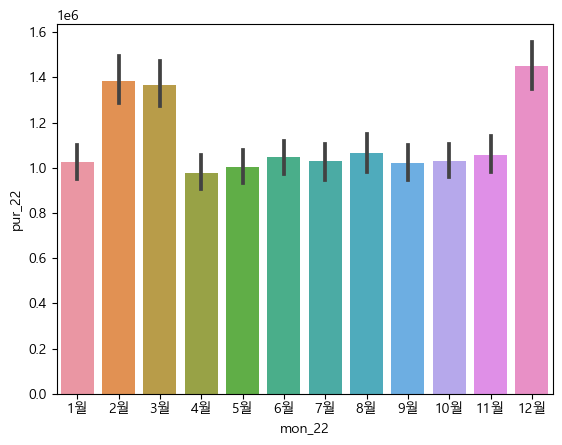

In [26]:
#월별 판매액 그래프
sns.barplot(x='mon_22', y='pur_22', order=['1월', '2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'], data=df)
# sns.barplot(x='mon_23', y='pur_23', order=['1월', '2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'], data=df)

In [27]:
##### 월별 매출액 추이, 구매형태 #####
mons22 = df.groupby(['channel','mon_22'])
mo22 = mons22.agg({'pur_22':['sum','mean']}).round(1)
mo22

# 팝업스토어는 전체 매출에 비해 각 월별 매출액은 적은 편(거의 절반 수준)
# 단 12,2,3월 매출이 높아 전체 평균이 올라간 케이스 (다른 월에 비해 3~4배)

pur_22           
                      sum       mean
channel mon_22                      
기타      11월        408000   204000.0
        2월         329000   164500.0
        4월        4899000  2449500.0
        6월         968000   968000.0
        8월        2808000  1404000.0
...                   ...        ...
할인마트    6월      158230000   855297.3
        7월      167546000  1040658.4
        8월      159563000  1009892.4
        9월      164298000  1066870.1
        정보없음      4984000  2492000.0

[70 rows x 2 columns]

In [28]:
##### 구매 감소 고객_성별 #####
gen = df.groupby(['gender','sales'])
gen_m = gen.agg({'pur_gap':'sum', 'gender':'count'}).round(1)
gen_m

# 구매 증가 고객의 경우 남녀 비율이 비슷한 편
# 그러나 구매 감소 고객의 경우 남성 비율이 훨씬 높음
# 구매 감소폭이 증가폭보다 높음 (22년 대비 23년 매출 하락)

pur_gap  gender
gender sales                      
남성     0      2.691761e+09    3276
       1      1.751743e+09    2474
여성     0      1.463272e+09    1680
       1      1.791899e+09    2501
정보없음   0      9.870000e+05       4
       1      2.575000e+06       6